# Analysing Data + Statistics: Solutions

## What we will be doing and how

In this lesson, we will be analysing a dataset from the World Health Organisation. We will first load the data that we will be using, and then looking through it to understand it. When this is done, we will need to clean it on order to get the parts that are interesting to us, and then we will find some correlations among variable to see how they relate to each other. More specifically, we will be looking at the correlation between GDP and life expectancy.


### How does this notebook work?

Run the cells with code written on them. To do this, you can select them and press Shift + Enter or press the "Play" button on the left side of the cell (if you do not see this, hover with the mouse on the cell and it should appear). Remember that all cells need to be run in order, even those in which you did not need to write any code. If you think you might have skipped one, on the left side of the cell you will find the line number, which corresponds to the order in which you have ran the cells. Keep in mind that if you run a cell and it gets numbered as 4, if you run the same cell immediately after it will be renumbered to 5.

Looking at the code you will notice some parts are incomplete and have '\_\_' written instead. This means that you need to complete that part of the code. In some other parts, you will need to write your own code. This will be specified.

You will also find hyperlinks to documentation on different functions that we will use. It is recommended to look at them to familiarise yourself with what you are doing and how they work.

There are also questions to be completed in text cells. Click twice on them to start editing them or select them and press Enter, and press Shift+Enter when you are finished to go back to reading mode. The questions can be answered in one or two sentences in general.

In [1]:
import os
import pandas
import matplotlib.pyplot
import numpy 
import seaborn
import math

Here you have links to the libraries we have imported:

[OS library](https://docs.python.org/3/library/os.html): Library with different useful functions to interact with the Operating System. We will be using this for loading the datasets.

[Pandas](https://pandas.pydata.org/): Pandas is a tool for data analysis and manipulation.

[Seaborn](https://seaborn.pydata.org/): Seaborn is a library specialised in statistical data visualisation.

[Numpy](https://numpy.org/): Numpy is the Python library for mathematics. We will use it for performing operations on our data.

[Matplotlib](https://matplotlib.org/): Matplotlib is another library specilised in visualisation for Python.

[Math module](https://docs.python.org/3/library/math.html): This module provides mathematical functions defined by the C standard.

### Activity 1: Getting to know our data

Now, we need to load the data we will be using.

For this we have to get the path to the data we are using, and then read the file. In this case, it is in the datasets
folder inside our working directory called 'datasets', and the file name is 'who_countries.csv'. This dataset contains health information on several countries of the world from 2000 to 2015.

In [2]:
#Get the path to the file we will be using.
path = os.path.join(os.getcwd(), 'datasets', 'who_countries.csv')
#Load the data into the countries_info variable. This results in a DataFrame object.
countries_info = pandas.read_csv(path, delimiter = ',')

Now we we will look at the dataset that we have loaded.

In [3]:
#Just writing the name of a variable in a cell is enough to print its value
countries_info

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


This gives us a rough idea of the data we are working with, but we can get more information on what is part of the dataset using other functions, as shown below. 

In [4]:
#Number of rows and columns in the format (rows, columns)
print("Number of rows and columns:",countries_info.shape, "\n") 
#Name of the columns
print("Name of the columns: ",countries_info.columns, "\n")
#Check the type of each of the columns of the data we are using
print("Type of each of the columns:\n",countries_info.dtypes)

Number of rows and columns: (2938, 22) 

Name of the columns:  Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under- five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Income composition of resources', 'Schooling'],
      dtype='object') 

Type of each of the columns:
 Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under- five deaths              

When analysing data, we are interested in different statistics. The [describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function in Python gives us many of these statistics for our dataset. 

In [5]:
#Use the DataFrame function describe() to see a summary of the dataset
countries_info.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under- five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000



***Looking at the columns, you will notice that the "Country" column does not appear. Looking at the types of each of the columns, can you infer why this is the case?*** 

This is because the "Country" column does not have numerical values, they are strings that represent the names of the countries. As such, it is not possible to apply numerical operations to them.

***This is a summary of statistics over the whole dataset, which takes countries around the world over 15 years. What has been the maximum life expectancy so far in the world?***

The maximum life expectancy so far has been 89 years.


Now we know that our dataset has 2938 rows, and that it should have entries for each country between 2000 and 2015, meaning 16 entries each. 2938 is not a multiple of 16, which means that some countries are missing entries. We will have to keep this in mind for our analysis, as the amount of data we have for each year might differ.

Look at the summary statistics again, especially the mean. This mean is calculated taking values of different countries in different years, so it can not really tell us much (for example, we can not know the average life expectancy in the world because it combines different years). This means that we will need to take a specific year to look at the countries' GDP and life expectancy.

### Activity 2: Tidying up the data

In this part we will look only at the columns we are interested in. This means that we will have to take just those, and rename them when necessary to get our data to fit conventions. For this, we will use the loc[] function, to which we give the names of the columns we want to select as input. The columns we are interested in are the following: Country, Year, GDP, Life expectancy.

In [6]:
selection_info = countries_info.loc[:,['Country', 'Year', 'GDP', 'Life expectancy']]

The naming of the columns is not as conventions dictate. In regards to column naming, the conventions ask for names to be like_this (i.e. lowercase letters and underscore instead of space). None of the columns we have extracted comply with this, so we will now rename them using the [rename()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) function. The first one is an example of how to do it, do the same to rename the rest of the columns.

In [7]:
#In the following code, the name before the : is the current column name, the one after is what
#you want to change it to.
selection_info.rename({'Country':'country'},axis = 'columns', inplace=True)
#Copy the above line and change the names for the rest of the columns that need so.
selection_info.rename({'Year':'year'},axis = 'columns', inplace=True)
selection_info.rename({'GDP':'gdp'},axis = 'columns', inplace=True)
selection_info.rename({'Life expectancy':'life_expectancy'},axis = 'columns', inplace=True)

Now that we have this selection and the names , we can look at one specific country, Australia in this case.
For this, we will use the [loc[]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) function again, but this time we will use it so it only takes entries with the value 'Australia' in the column 'Country'.

In [8]:
info_au = selection_info.loc[selection_info['country'] == 'Australia']

In [9]:
info_au

,country,year,gdp,life_expectancy
112,Australia,2015,56554.38760,82.8
113,Australia,2014,62214.69120,82.7
114,Australia,2013,67792.33860,82.5
115,Australia,2012,67677.63477,82.3
116,Australia,2011,62245.12900,82.0
117,Australia,2010,51874.84800,81.9
118,Australia,2009,42742.99898,81.7
119,Australia,2008,49664.68540,81.3
120,Australia,2007,4991.98289,81.3
121,Australia,2006,36118.28381,81.2


***Looking at Australia's information, have both the GDP and life expectancy grown over time? Do you think these two could be related?***

We will now take the data from 2015, and will also be looking at the life expectancy and GDP of each of the countries. Because there are many countries, we will now visualise the data to see if the GDP and life expectancy are related, meaning if there is a correlation between them.

In [10]:
#The .loc[a] function allows us to get data from a DataFrame that satisfies a condition a
info_15 = selection_info.loc[selection_info['year'] == 2015]
#In this case, we are getting the data that has 2015 as a value on the 'Year' column

#Use the describe() function again to see the summary of our selected data
info_15.describe()

,year,gdp,life_expectancy
count,183.0,154.000000,183.000000
mean,2015.0,7185.331746,71.616940
std,0.0,11697.508913,8.123706
min,2015.0,33.681223,51.000000
25%,2015.0,766.008101,65.750000
50%,2015.0,2916.228918,73.900000
75%,2015.0,7290.107448,76.950000
max,2015.0,66346.522670,88.000000


In this activity, we will be working with the GDP and Life expectancy attributes. GDP stands for [Gross Domestic Product](https://www.investopedia.com/terms/g/gdp.asp), and it gives a sense of how rich a country is.

In order to know more about these, we will now plot their [distribution](https://seaborn.pydata.org/generated/seaborn.distplot.html).

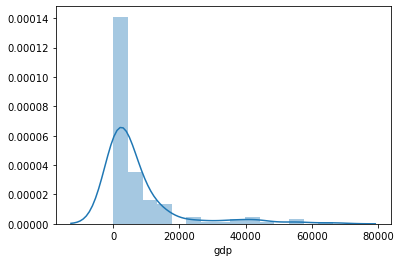

In [11]:
#Plotting the distribution for the GDP
seaborn.distplot(info_15['gdp'], bins = 15)

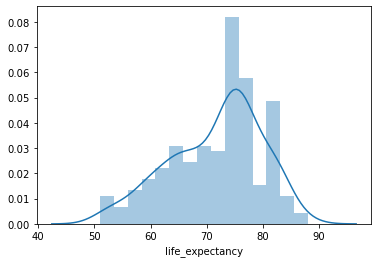

In [12]:
#Write the necessary code for plotting the distribution of the Life expectancy
seaborn.distplot(info_15['life_expectancy'], bins = 15)

***Seeing the GDP distribution, would you say that most countries have a high GDP? Why?***

No, most countries have a low GDP. This can be seen in the fact that the curve is higher closer to 0.

***Having seen the distribution for both life expectancy and GDP, can you guess from these if there is a correlation?***

No, this is not possible because we do not see the relation between the two, there is no possible way for us to see in this graphs what is the life expectancy and GDP of a specific country. 

Now that we know our data a bit better, let's try to find relationships in it. For doing this, we will be looking at the correlation between attributes by plotting pairs of them. Remember that an easy way to see if there is a correlation between two variables is to plot them and try to fit a line through the points.

Before going further with our data, we need to check for missing values. These appear as NaN (Not a Number). To check if any of our columns has missing values, we use the [isna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) function to get a list of booleans (True if the value is missing, False if not), and then use [sum()](https://docs.python.org/3/library/functions.html#sum)to count the number of True values in the list.

In [13]:
print("Missing values in GDP: ",info_15['gdp'].isna().sum())
print("Missing values in life expectancy: ", info_15['life_expectancy'].isna().sum())

Missing values in GDP:  29
Missing values in life expectancy:  0


Now we have seen that there are some data points for which we do not have some of the values. This means that we need to delete those for our representation.

To drop the NaN values, we use the DataFrame function .dropna(a), where a in this case stands for the subset of the names of the columns we want to act on.


In [14]:
#Complete the function with the names of the columns in which we are deleting NaN values
clean_info_15 = info_15.dropna(subset=['gdp'])

 We will now use the function *plt.plot(x, y, 'o')* to plot the points.

Note: The 'o' at the function arguments is for it to draw circular points. Other markers are available, check the [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) for these.

Text(0, 0.5, 'life_expectancy')

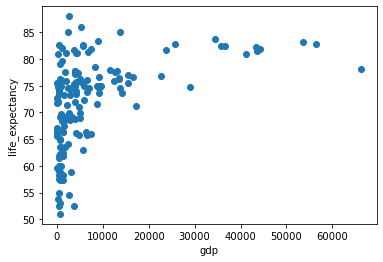

In [15]:
matplotlib.pyplot.plot(clean_info_15['gdp'], clean_info_15['life_expectancy'], 'o')
matplotlib.pyplot.xlabel("gdp")
matplotlib.pyplot.ylabel("life_expectancy")

***Remember that each point represents a country. Does the distribution of these match the distribution we plotted earlier?***

Yes, because there are more points (countries) closer to zero than further from it in case of the GDP, and most of them fall between 60 and 80 in case of life expectancy.

***From this plot, can you deduce if there is correlation between GDP and life expectancy?***

It is possible to think there is correlation if you think of logarithmic scales. Otherwise, there is not a clear "straight line" for these points.

There are many points close to 0. This is because some GDPs are very big compared to others. So, in order to represent the data properly and see if there is in fact a correlation, we need to change the scale of the GDP axis. What scale would be the most appropriate to do this? Write the necessary code for representing the data in the new scale. Also note that the shape of the data points is very similar to that of a logarithmic function.

Look at the documentation for the function [.xscale()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html) to find what argument you need to use for your scale.

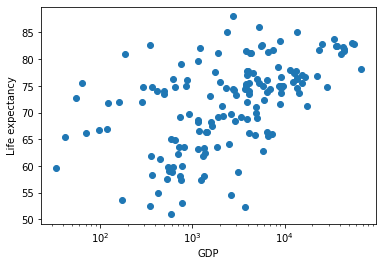

In [16]:
matplotlib.pyplot.plot(clean_info_15['gdp'], clean_info_15['life_expectancy'], 'o')
#Fill in the correct argument
matplotlib.pyplot.xscale('log')
matplotlib.pyplot.xlabel("GDP")
matplotlib.pyplot.ylabel("Life expectancy")
matplotlib.pyplot.show()

***Do you think there is a correlation here?***

Yes, there is. It would  be possible to fit a line through the points

Now, we will plot the fitting line. In this case, we will be using the seaborn [regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html) function, which fits a Machine Learning model known as linear regression and plots the data points and a fitting line.

In the code, you will see that we are taking the logarithm of all the GDP values and feeding that into the function, instead of changing the scale, using a [list comprehension](https://docs.python.org/3/tutorial/datastructures.html). Here we are creating a new variable that will be more useful to us than the one we had before. We do this is because we want to fit the line to the transformed values, otherwise the line would be skewed. 

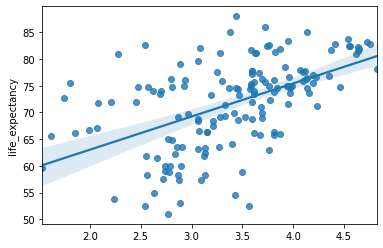

In [17]:
#You do not need to do anything here, just run the cell

#We first get the logarithm of all the GDP values
log_gdp = [math.log10(val) for val in clean_info_15['gdp']]
#Plot the information and fit a line to the points
seaborn.regplot(log_gdp, clean_info_15['life_expectancy'])

Finally, we will now calculate the value of the correlation between both attributes. We will use the NumPy function [corrcoef(x,y)](https://realpython.com/numpy-scipy-pandas-correlation-python/). This function returns a 2x2 matrix with the correlation coefficients between the two arguments (i.e. \[x-x, y-x\], \[x-y, y-y\]).We are interested in the x-y or y-x coefficients.  We will again apply a logarithmic function to our GDP data before passing it into the function.

In [18]:
numpy.corrcoef(log_gdp, clean_info_15['life_expectancy'])

array([[1.        , 0.52080855],
       [0.52080855, 1.        ]])

***What correlation coefficient did you obtain? Do you think this is a strong or a weak correlation? Remember that a correlation value can go from -1 to 1, 0 being no correlation at all.***

The coefficient obtained is 0.64. This is a fairly strong coefficient, but not too much.

### Activity 3

Keeping in mind what we have done until here, take now the GDP and the Schooling variables from the year 2010 and check if there is a correlation. Remember the following:
    
    -Delete the empty values where necessary 
    
    -Label all the plots you make
    
    -Use an appropriate scale when necessary

When you have your final result, make sure that you explain why do you think there is or there is not a correlation.

Missing GDP values:  27
Missing schooling values:  10
Correlation coefficient:  0.5761683891212473


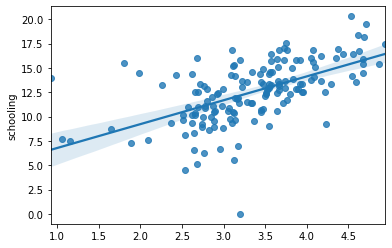

In [24]:
#Get the columns that matter to us
info_10 = countries_info.loc[:, ['Country', 'Year', 'GDP', 'Schooling']]
#Rename the columns
info_10.rename({'Country':'country', 'Year':'year', 'GDP':'gdp', 'Schooling':'schooling'}, axis='columns', inplace=True)
#Get the data for 2010
info_10 = info_10.loc[info_10['year']==2010]

#Check for missing values
print("Missing GDP values: ", info_10['gdp'].isna().sum())
print("Missing schooling values: ", info_10['schooling'].isna().sum())
#Deleting the missing values
clean_info_10 = info_10.dropna(subset=['gdp', 'schooling'])

#Take the log for the GDP
gdp_log = [math.log10(val) for val in clean_info_10['gdp']]
#Plot the data with a fitting line
seaborn.regplot(gdp_log, clean_info_10['schooling'])
#Print the correlation coefficient
print("Correlation coefficient: ",numpy.corrcoef(gdp_log, clean_info_10['schooling'])[0,1])